In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Bước 1: xử lý dữ liệu cơ bản theo yêu cầu

In [3]:
df = pd.read_csv('../orginal_sales_data_edit.csv', encoding= 'utf-8', header=0, delimiter=',' )

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.dropna(how='all', inplace= True)

In [6]:
df[['ORDERNUMBER', 'ORDERDATE']]

,ORDERNUMBER,ORDERDATE
0,10107,2/24/2003
1,10121,5/7/2003
2,10134,7/1/2003
3,10145,8/25/2003
4,10159,10/10/2003
...,...,...
2818,10350,12/2/2004
2819,10373,1/31/2005
2820,10386,3/1/2005
2821,10397,3/28/2005


In [7]:
df.drop_duplicates(inplace= True)

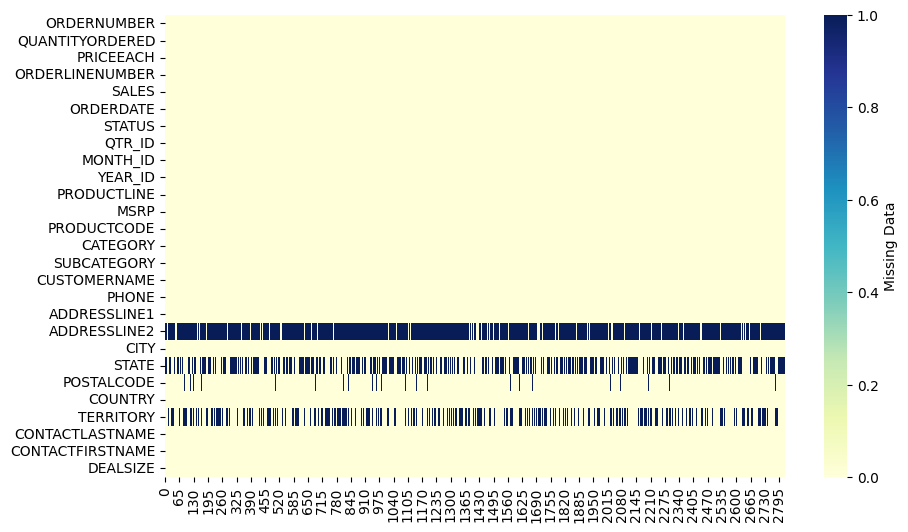

In [8]:
# 1.4 Kiểm tra dữ liệu thiếu bằng chart
# Trực quan hóa dữ liệu với seaborn heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
    cmap= "YlGnBu",
    cbar_kws = {'label': 'Missing Data'})

plt.savefig("my_missing_value_1.png", dpi = 100)

<Figure size 1000x600 with 0 Axes>

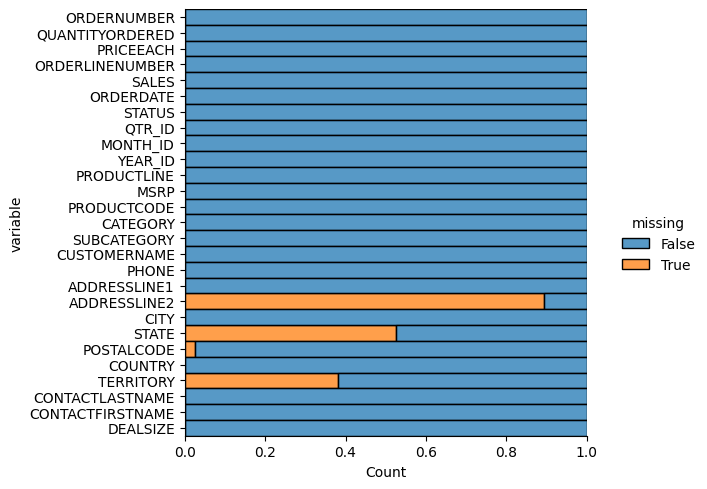

In [9]:
# cach 2
plt.figure(figsize= (10,6))
sns.displot(
    data = df.isna().melt(value_name = 'missing'),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.25
)

plt.savefig("my_missing_value_2.png",dpi = 100)

In [10]:
df[["ADDRESSLINE2","STATE","TERRITORY","POSTALCODE"]]

,ADDRESSLINE2,STATE,TERRITORY,POSTALCODE
0,NaN,NY,NaN,10022
1,NaN,NaN,EMEA,51100
2,NaN,NaN,EMEA,75508
3,NaN,CA,NaN,90003
4,NaN,CA,NaN,NaN
...,...,...,...,...
2818,NaN,NaN,EMEA,28034
2819,NaN,NaN,EMEA,90110
2820,NaN,NaN,EMEA,28034
2821,NaN,NaN,EMEA,31000


In [11]:
df['ADDRESSLINE2'].fillna('Unknown', inplace= True)
df['STATE'].fillna('Unknown', inplace= True)
df['TERRITORY'].fillna('Unknown', inplace= True)
df['POSTALCODE'].fillna(0, inplace= True)


In [12]:
df[["ADDRESSLINE2","STATE","TERRITORY","POSTALCODE"]]


,ADDRESSLINE2,STATE,TERRITORY,POSTALCODE
0,Unknown,NY,Unknown,10022
1,Unknown,Unknown,EMEA,51100
2,Unknown,Unknown,EMEA,75508
3,Unknown,CA,Unknown,90003
4,Unknown,CA,Unknown,0
...,...,...,...,...
2818,Unknown,Unknown,EMEA,28034
2819,Unknown,Unknown,EMEA,90110
2820,Unknown,Unknown,EMEA,28034
2821,Unknown,Unknown,EMEA,31000


<Figure size 1000x600 with 0 Axes>

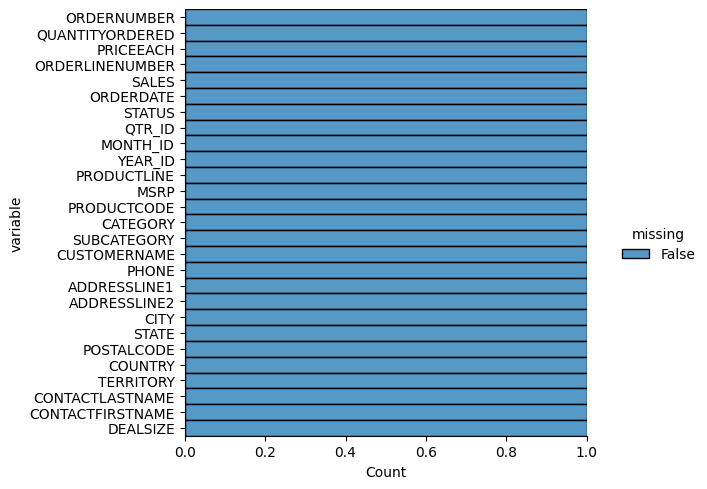

In [13]:
# cach 2
plt.figure(figsize= (10,6))
sns.displot(
    data = df.isna().melt(value_name = 'missing'),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.25
)

plt.savefig("my_missing_value_2.png",dpi = 100)


In [14]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003,Shipped,1,2,2003,...,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003,Shipped,2,5,2003,...,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003,Shipped,3,8,2003,...,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003,Shipped,4,10,2003,...,7734 Strong St.,Unknown,San Francisco,CA,0,USA,Unknown,Brown,Julie,Medium


xuất dữ liệu sau khi đã xử lý

In [15]:
df.to_csv('processed_sales_data.csv', sep= ',', encoding='utf-8',index=False)

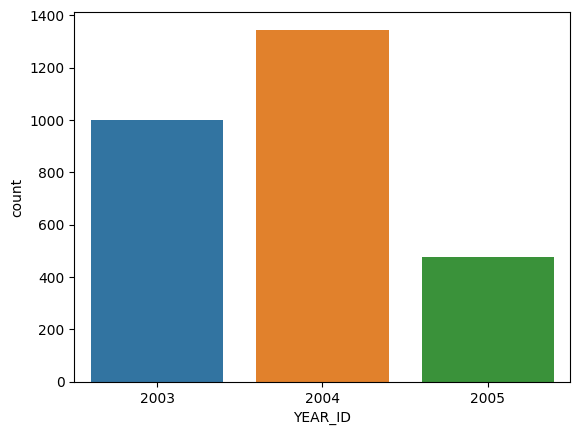

In [16]:
sns.countplot(x = "YEAR_ID", data = df)
plt.show()

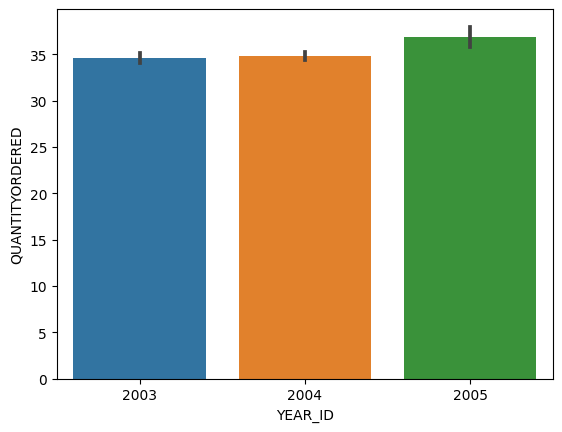

In [22]:
sns.barplot(x = "YEAR_ID", y = "QUANTITYORDERED", data = df)
plt.show()

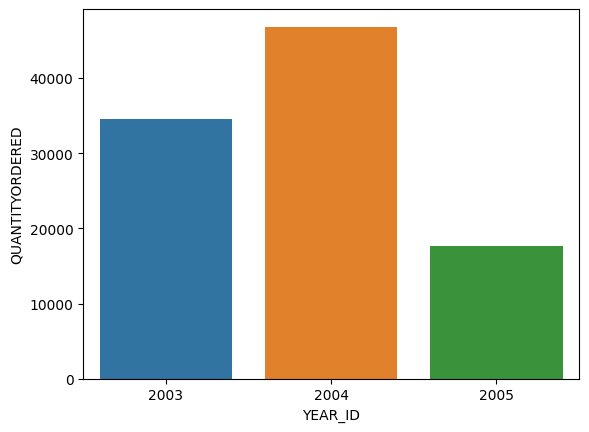

In [24]:
sns.barplot(
    x="YEAR_ID", y = "QUANTITYORDERED",
    data =df, errorbar = None, estimator= sum
)

plt.show()

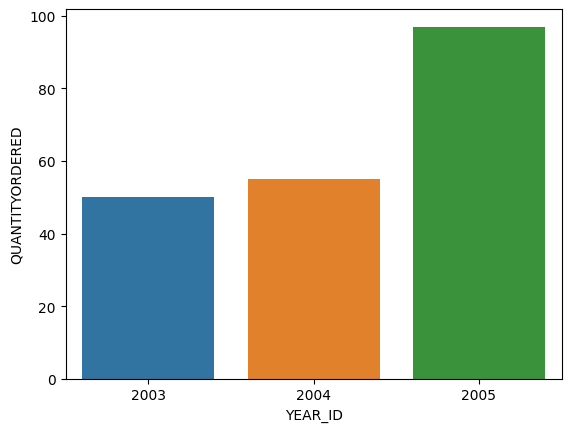

In [28]:
from audioop import avg
from itertools import count
from statistics import mean


sns.barplot(
    x="YEAR_ID", y = "QUANTITYORDERED",
    data =df, errorbar = None, estimator= max
)

plt.show()

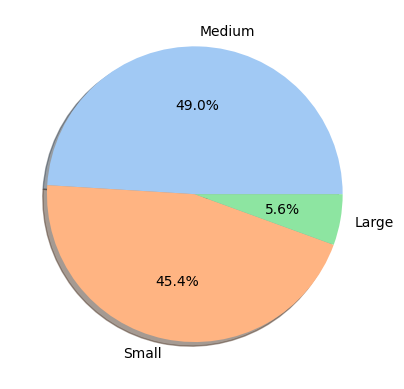

In [35]:
# tỉ lệ số đơn hàng theo dealsize 
labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values, labels= labels, colors= colors,autopct= '%1.1f%%',shadow= True)
plt.show()

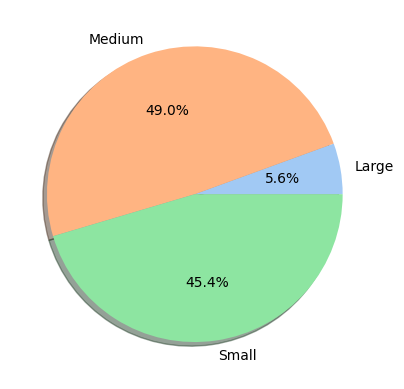

In [34]:
gb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
data = list(gb['count'])
labels = gb.index
colors = sns.color_palette('pastel')

plt.pie(data, labels= labels, colors= colors, autopct= '%1.1f%%', shadow= True)
plt.show()

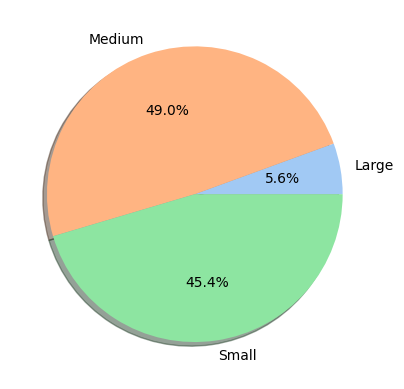

In [39]:
gb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['sum'])
data = list(gb['sum'])
labels = gb.index
colors = sns.color_palette('pastel')

plt.pie(data, labels= labels, colors= colors, autopct= '%1.1f%%', shadow= True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

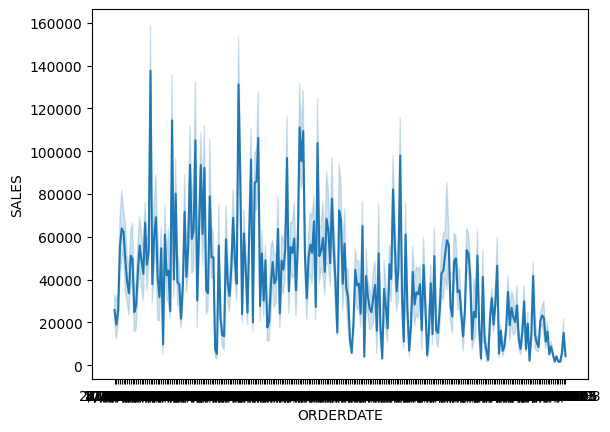

In [40]:
sns.lineplot(x = 'ORDERDATE', y = 'SALES', data = df, estimator=sum)
plt.show

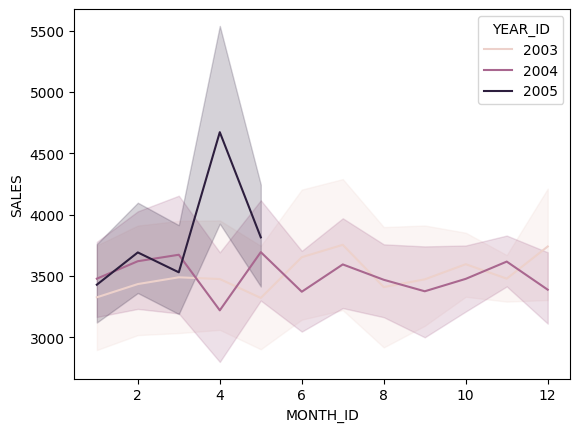

In [42]:
sns.lineplot(x = "MONTH_ID", y = "SALES", hue = "YEAR_ID", data = df)
plt.show()

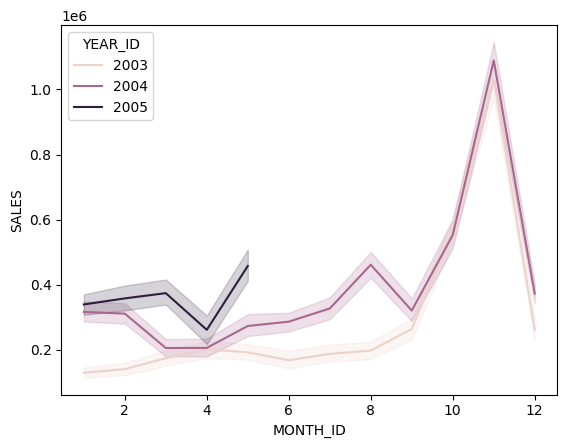

In [47]:
sns.lineplot(x = "MONTH_ID", y = "SALES", hue = "YEAR_ID", data = df, estimator= 'sum')
plt.show()

In [48]:
from numpy import count_nonzero

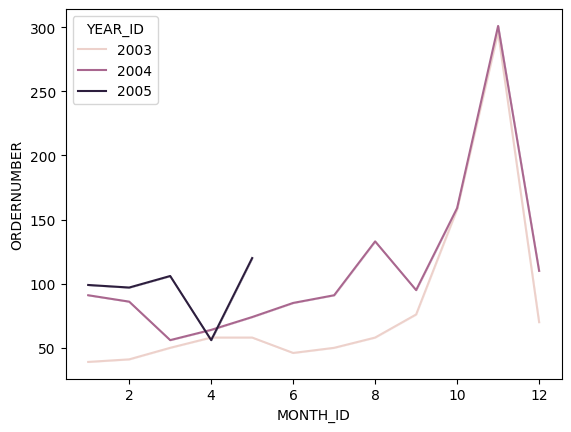

In [50]:
# hãy cho biết số lượng hóa đơn theo tháng, năm 
sns.lineplot( x = "MONTH_ID", y = "ORDERNUMBER", hue = "YEAR_ID",data = df, estimator= count_nonzero)
plt.show()

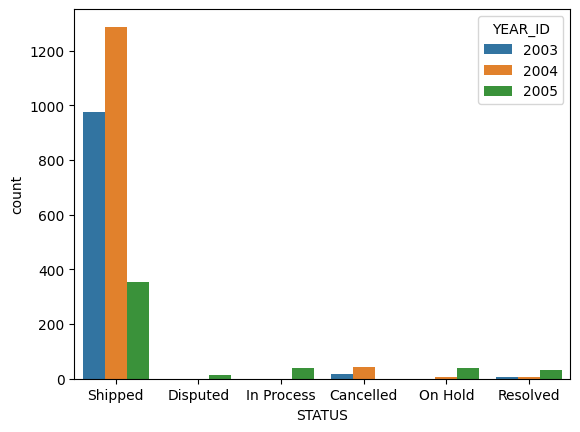

In [51]:
# trạng thái só đơn hàng theo nhóm các năm 
sns.countplot( x = "STATUS", data = df, hue = "YEAR_ID")
plt.show()

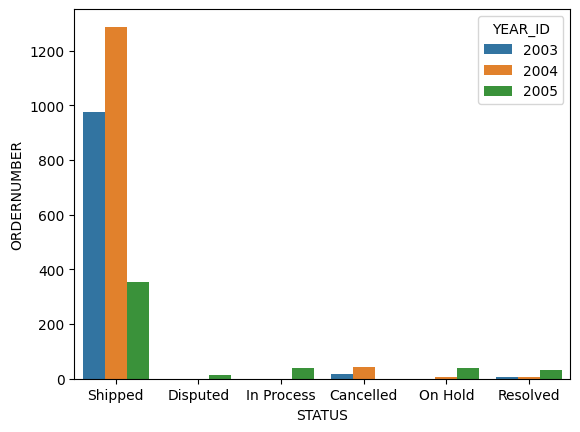

In [53]:
sns.barplot(x = 'STATUS', y = 'ORDERNUMBER', hue = 'YEAR_ID', data = df,
errorbar= None, estimator= count_nonzero)
plt.show()

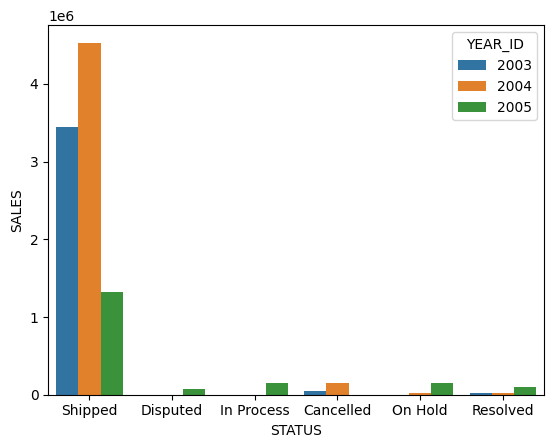

In [56]:
# trung bình giá trị đơn hàng theo trạng thái (STATUS) theo nhóm các năm 
sns.barplot(x = 'STATUS', y = 'SALES', hue = 'YEAR_ID', data = df,
errorbar= None, estimator= sum)
plt.show()

<AxesSubplot:xlabel='DEALSIZE'>

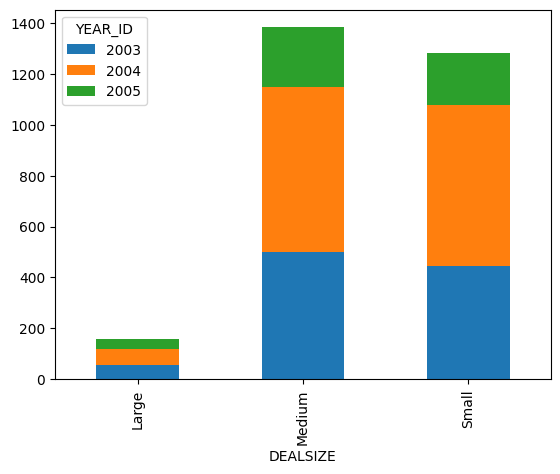

In [59]:
gb = df.groupby(['DEALSIZE', 'YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind= 'bar', stacked= True)

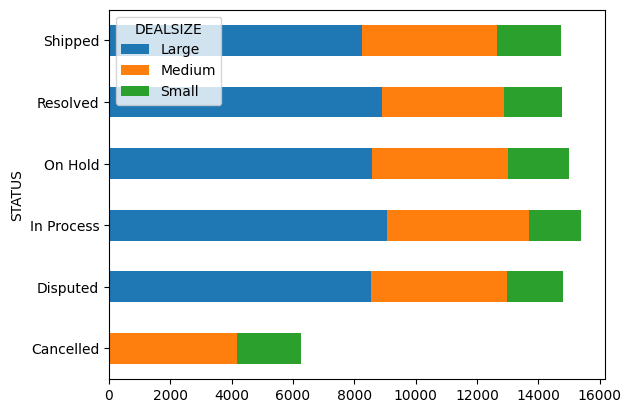

In [60]:
gb = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().unstack()
gb.plot(kind = 'barh', stacked= True)
plt.show()

Phần 3: mô tả dữ liệu


In [61]:
df['QUANTITYORDERED'].describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [65]:
df.groupby(['DEALSIZE'])['QUANTITYORDERED'].describe()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,47.222930,10.082098,29.0,42.0,46.0,50.0,97.0
Medium,1384.0,37.947254,8.443130,20.0,32.0,39.0,45.0,66.0
Small,1282.0,30.525741,8.485265,6.0,24.0,29.0,36.0,64.0


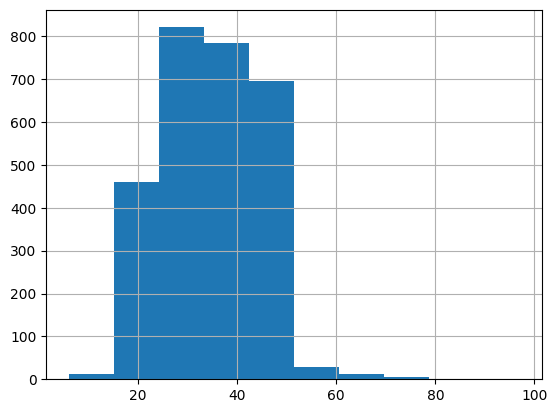

In [66]:
# du lieu dinh luong 
df['QUANTITYORDERED'].hist()
plt.show()